In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, "D:/playground/data-science//libs")
from simulation_core import Simulation

pd.set_option('display.max_columns', None)

86400 24 3600


In [2]:
def plot_mints(mitigated_mints: pd.DataFrame, pure_mints: pd.DataFrame, width: int=10, height: int=10):
    """plot red line of original mints and blue dots of mitigated ones

    Args:
        mitigated_mints (pd.DataFrame): dataset of mitigated mints
        pure_mints (pd.DataFrame): pure dataset of mints without mitigation
        width (int, optional): width. Defaults to 10.
        height (int, optional): height. Defaults to 10.
    """
    fig, ax = plt.subplots(figsize=(width, height))

    ax.plot(pure_mints.X_amount, pure_mints.Y_amount, c='red', label='mitigation off')
    ax.scatter(mitigated_mints.X_amount, mitigated_mints.Y_amount, c='blue', label='mitigation on')

    ax.set_title('Scatterplot of the mints for ACAB/WETH pool')
    ax.legend()
    ax.set_xlabel('X token amount')
    ax.set_ylabel('Y token amount')

    plt.show()

Setting up the simulations parameters, with identifying their paths

**cell below is executed ONLY ONCE BECAUSE OF FOUND MINTS TABLE ERROR**

In [3]:
# mints_df = pd.read_pickle(f'{os.getcwd()}\data\pair_history\LADY_WETH\lady_weth_mints.pkl')
# lady_series = mints_df.amount1.copy()   # copy placed, because otherwise reference is placed
# weth_series = mints_df.amount0.copy()
# mints_df.amount0 = lady_series
# mints_df.amount1 = weth_series
# mints_df.to_pickle(f'{os.getcwd()}\data\pair_history\LADY_WETH\lady_weth_mints.pkl')

# mints_df = pd.read_pickle(fr'{os.getcwd()}\data\pair_history\NFD_WETH\nfd_weth_mints.pkl')
# nfd_series = mints_df.amount0.copy()   # copy placed, because otherwise reference is placed
# weth_series = mints_df.amount1.copy()
# mints_df.amount1 = nfd_series
# mints_df.amount0 = weth_series
# mints_df.to_pickle(fr"{os.getcwd()}\data\pair_history\NFD_WETH\nfd_weth_mints.pkl")
# mints_df

In [4]:
acab_weth_sim = Simulation(experiment_id=1, x_name='ACAB', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
cat_weth_sim = Simulation(experiment_id=2, x_name='CAT', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
dog_weth_sim = Simulation(experiment_id=3, x_name='DOG', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
lady_weth_sim = Simulation(experiment_id=4, x_name='LADY', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
nfd_weth_sim = Simulation(experiment_id=5, x_name='NFD', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_', x_index='0', y_index='1')
tiara_weth_sim = Simulation(experiment_id=6, x_name='$TIARA', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_', x_index='1', y_index='0')

**IMPORTANT: launch those simulations only if there are no data in package ```data/real_transactions```, otherwise skip this part** 

In [5]:
# running the simulations through the data
acab_weth_sim.run_simulation(False, True)
cat_weth_sim.run_simulation(False, True)
dog_weth_sim.run_simulation(True, True)
lady_weth_sim.run_simulation(False, True)
nfd_weth_sim.run_simulation(True, True)
tiara_weth_sim.run_simulation(True, True)

17it [00:00, 435.50it/s]
17it [00:00, 424.61it/s]
0it [00:00, ?it/s]

86400 3600 24
mints:  1
86400 3600 24
mints:  1
86400 3600 24


47it [00:00, 229.06it/s]
42it [00:00, 388.53it/s]

mints:  1
86400 3600 24


47it [00:00, 218.41it/s]
0it [00:00, ?it/s]

mints:  1
86400 3600 24


18690it [00:02, 7770.70it/s]


mints:  75


568it [00:00, 3036.64it/s]

86400 3600 24


18690it [00:03, 5430.04it/s]


mints:  75


834it [00:00, 8332.86it/s]

86400 3600 24


1738it [00:00, 3445.45it/s]
0it [00:00, ?it/s]

mints:  1
86400 3600 24


1738it [00:00, 2243.55it/s]


mints:  1


1it [00:00,  8.88it/s]

86400 3600 24


18899it [00:02, 7354.52it/s]


mints:  65


154it [00:00, 1538.67it/s]

86400 3600 24


18899it [00:03, 6130.76it/s]


mints:  65


140it [00:00, 1165.67it/s]

86400 3600 24


182it [00:00, 465.67it/s] 
135it [00:00, 1296.96it/s]

mints:  3
86400 3600 24


182it [00:00, 414.69it/s] 

mints:  3


Loading the simulation results into different dataframes depending on their data.

In [6]:
# ACAB/WETH
acab_weth_swaps_mitigation_off_df, acab_weth_mints_mitigation_off_df, acab_weth_burns_mitigation_off_df = acab_weth_sim.read_simulation(0)
acab_weth_swaps_mitigation_on_df, acab_weth_mints_mitigation_on_df, acab_weth_burns_mitigation_on_df = acab_weth_sim.read_simulation(1)

# CAT/WETH
cat_weth_swaps_mitigation_off_df, cat_weth_mints_mitigation_off_df, cat_weth_burns_mitigation_off_df = cat_weth_sim.read_simulation(0)
cat_weth_swaps_mitigation_on_df, cat_weth_mints_mitigation_on_df, cat_weth_burns_mitigation_on_df = cat_weth_sim.read_simulation(1)

# DOG/WETH
dog_weth_swaps_mitigation_off_df, dog_weth_mints_mitigation_off_df, dog_weth_burns_mitigation_off_df = dog_weth_sim.read_simulation(0)
dog_weth_swaps_mitigation_on_df, dog_weth_mints_mitigation_on_df, dog_weth_burns_mitigation_on_df = dog_weth_sim.read_simulation(1)

# LADY/WETH
lady_weth_swaps_mitigation_off_df, lady_weth_mints_mitigation_off_df, lady_weth_burns_mitigation_off_df = lady_weth_sim.read_simulation(0)
lady_weth_swaps_mitigation_on_df, lady_weth_mints_mitigation_on_df, lady_weth_burns_mitigation_on_df = lady_weth_sim.read_simulation(1)

# NFD/WETH
nfd_weth_swaps_mitigation_off_df, nfd_weth_mints_mitigation_off_df, nfd_weth_burns_mitigation_off_df = nfd_weth_sim.read_simulation(0)
nfd_weth_swaps_mitigation_on_df, nfd_weth_mints_mitigation_on_df, nfd_weth_burns_mitigation_on_df = nfd_weth_sim.read_simulation(1)

# TIARA/WETH
tiara_weth_swaps_mitigation_off_df, tiara_weth_mints_mitigation_off_df, tiara_weth_burns_mitigation_off_df = tiara_weth_sim.read_simulation(0)
tiara_weth_swaps_mitigation_on_df, tiara_weth_mints_mitigation_on_df, tiara_weth_burns_mitigation_on_df = tiara_weth_sim.read_simulation(1)

# ACAB/WETH pool

Current pool contains a too small transaction history (only 15 transactions) where can be seen that some of transactions were blocked due to the not enough reserves amount in the transaction amount. There are no mitigation blocks performed and to ensure that simuation performed correctly after next cell will be reviewed situation with mints and burns

In [7]:
acab_weth_swaps_mitigation_on_df

,id,token_in,token_out,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,txd,sender,to,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff
0,1,WETH,ACAB,1.084038e+00,0.0,7.154652e-08,0.004336,CANT_CONSULT_ORACLE,NaN,NaN,NaN,NaN,SUCCESS,5.0,2021-11-30 18:13:36,2021-11-30 18:13:34,0x0e4a2cb4b6e605ca86bcb85b54711b9b6359e2e8203d...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x3ca17003820f7ebcd1ae70e24adea904590657e9,1,5.0,7.500000e+07,3.750000e+08,0,0,True,5.0,7.500000e+07,3.750000e+08,0,0,True,1.500000e+07,2.870533e-08
1,2,WETH,ACAB,2.167916e-01,0.0,1.430825e-08,0.000867,CHECKED,1.445277e-08,1.0,1.0,1.0,SUCCESS,15.0,2021-11-30 18:16:06,2021-11-30 18:15:57,0xf7a8942eb0c94ee50f258bdf9347ce7e58be98040559...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x6180441027cc27f63d3d25c43618199839f3570e,2,5.0,7.500000e+07,3.750000e+08,0,0,True,5.0,7.500000e+07,3.750000e+08,2250000064,0,True,1.500000e+07,5.740642e-09
2,3,WETH,ACAB,1.062972e-02,0.0,7.015616e-10,0.000043,CHECKED,7.086481e-10,1.0,1.0,1.0,SUCCESS,35.0,2021-11-30 18:21:06,2021-11-30 18:21:03,0xac16310193e3b07e21c2c14e69e72599a5441cb924ac...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x947d804dd60a6b6acade29e904177c0d3b1dca0c,3,5.0,7.500000e+07,3.750000e+08,2250000064,0,True,5.0,7.500000e+07,3.750000e+08,6750000219,0,True,1.500000e+07,2.814751e-10
3,4,WETH,ACAB,1.900000e-02,0.0,1.254000e-09,0.000076,CHECKED,1.266667e-09,1.0,1.0,1.0,SUCCESS,43.0,2021-11-30 18:23:06,2021-11-30 18:22:57,0x4e826df4738df9370364b682717992e0e6dd35b25b0a...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,4,5.0,7.500000e+07,3.750000e+08,6750000219,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,5.031199e-10
4,5,ACAB,WETH,2.115711e+06,0.0,7.499982e+07,NaN,NOT_REACHED,NaN,NaN,NaN,NaN,NOT_ENOUGH_RESERVES,164.0,2021-11-30 18:53:21,2021-11-30 18:53:11,0x464e0dcf1cbdcf11156bceaefbf0607ba627114bf6d9...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x06da0fd433c1a5d7a4faa01111c044910a184553,5,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,0.000000e+00
5,6,ACAB,WETH,1.773775e+05,0.0,7.499787e+07,NaN,NOT_REACHED,NaN,NaN,NaN,NaN,NOT_ENOUGH_RESERVES,545.0,2021-11-30 20:28:36,2021-11-30 20:28:25,0x0d3a2cc8476818124add83860cc0d7e7c3a5d39074a6...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,6,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,0.000000e+00
6,7,ACAB,WETH,1.333034e+07,0.0,7.499997e+07,NaN,NOT_REACHED,NaN,NaN,NaN,NaN,NOT_ENOUGH_RESERVES,2601.0,2021-12-01 05:02:36,2021-12-01 05:02:29,0x30cc6be280e3c3c231c87eeb786877e412ef2cde44c9...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,7,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,0.000000e+00
7,8,WETH,ACAB,1.000000e-01,0.0,6.600000e-09,0.000400,CHECKED,6.666666e-09,1.0,1.0,1.0,SUCCESS,5898.0,2021-12-01 18:46:51,2021-12-01 18:46:48,0x93911f23a326c1fb11461c75f2f045f92545219b8b21...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdb12ac354cf6ed2f4f92941929adf38fc923db78,8,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,1325925046693,0,True,1.500000e+07,2.648000e-09
8,9,WETH,ACAB,2.000000e-02,0.0,1.320000e-09,0.000080,CANT_CONSULT_ORACLE,NaN,NaN,NaN,NaN,SUCCESS,33174.0,2021-12-06 12:25:51,2021-12-06 12:25:51,0xc4d1456261b5f0fd54aa10a41a707f26869976e8b7ad...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x0c8351929dd1a1a469805f6a0fae888fc8cb7b6b,9,5.0,7.500000e+07,3.750000e+08,132592

In [8]:
acab_weth_swaps_mitigation_on_df[acab_weth_swaps_mitigation_on_df.status == 'NOT_ENOUGH_RESERVES']

,id,token_in,token_out,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,txd,sender,to,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff
4,5,ACAB,WETH,2.115711e+06,0.0,7.499982e+07,NaN,NOT_REACHED,NaN,NaN,NaN,NaN,NOT_ENOUGH_RESERVES,164.0,2021-11-30 18:53:21,2021-11-30 18:53:11,0x464e0dcf1cbdcf11156bceaefbf0607ba627114bf6d9...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x06da0fd433c1a5d7a4faa01111c044910a184553,5,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,0.0
5,6,ACAB,WETH,1.773775e+05,0.0,7.499787e+07,NaN,NOT_REACHED,NaN,NaN,NaN,NaN,NOT_ENOUGH_RESERVES,545.0,2021-11-30 20:28:36,2021-11-30 20:28:25,0x0d3a2cc8476818124add83860cc0d7e7c3a5d39074a6...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,6,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,0.0
6,7,ACAB,WETH,1.333034e+07,0.0,7.499997e+07,NaN,NOT_REACHED,NaN,NaN,NaN,NaN,NOT_ENOUGH_RESERVES,2601.0,2021-12-01 05:02:36,2021-12-01 05:02:29,0x30cc6be280e3c3c231c87eeb786877e412ef2cde44c9...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,7,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,0.0
12,13,ACAB,WETH,8.415058e+05,0.0,7.499955e+07,NaN,NOT_REACHED,NaN,NaN,NaN,NaN,NOT_ENOUGH_RESERVES,66650.0,2021-12-12 07:54:51,2021-12-12 07:54:39,0xde51007171f2a2638b578acdfc55e18d19107085066d...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,13,5.0,7.500000e+07,3.750000e+08,12633975550444,0,True,5.0,7.500000e+07,3.750000e+08,12633975550444,0,True,1.500000e+07,0.0


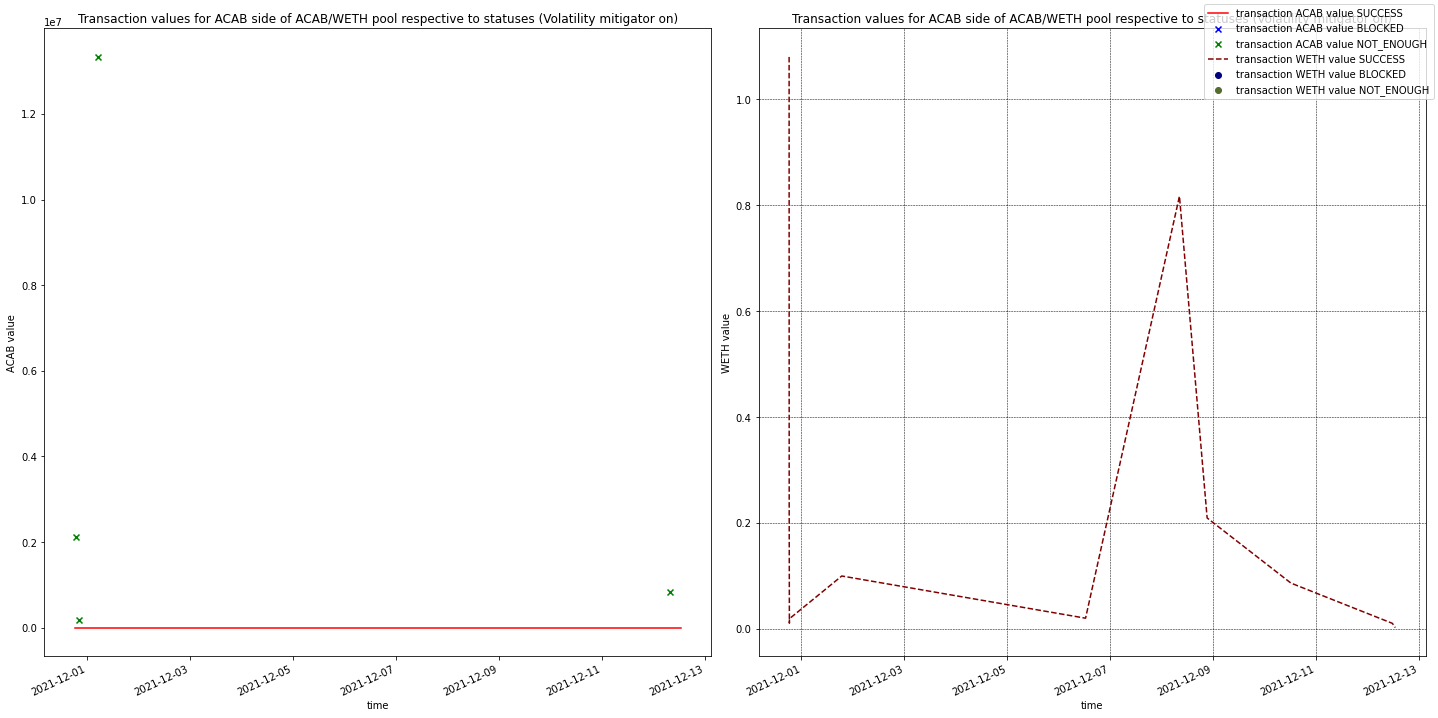

In [9]:
acab_weth_sim.plot_transactions_by_type(acab_weth_swaps_mitigation_on_df, ignoreSuccess=False, width=20, height=10, separatePlots=True)

Original ACAB/WETH pool has next statuses counts:
SUCCESS                11
NOT_ENOUGH_RESERVES     4
Name: status, dtype: int64
Mitigated ACAB/WETH dataframe has next statuses counts:
SUCCESS                11
NOT_ENOUGH_RESERVES     4
Name: status, dtype: int64
TWAP unavailability ratio for ACAB/WETH is 0.13333333333333333
Mitigated ACAB/WETH dataframe has next Mitigator statuses:
CHECKED                9
NOT_REACHED            4
CANT_CONSULT_ORACLE    2
Name: mitigator_check_status, dtype: int64


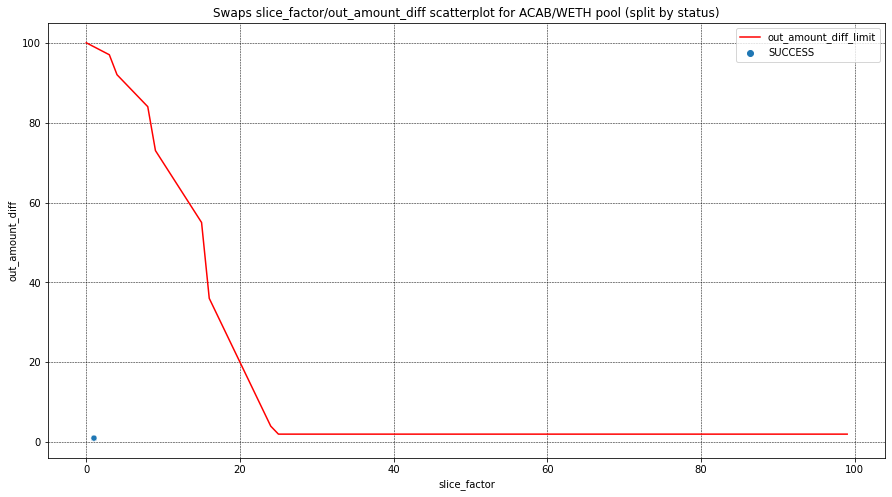

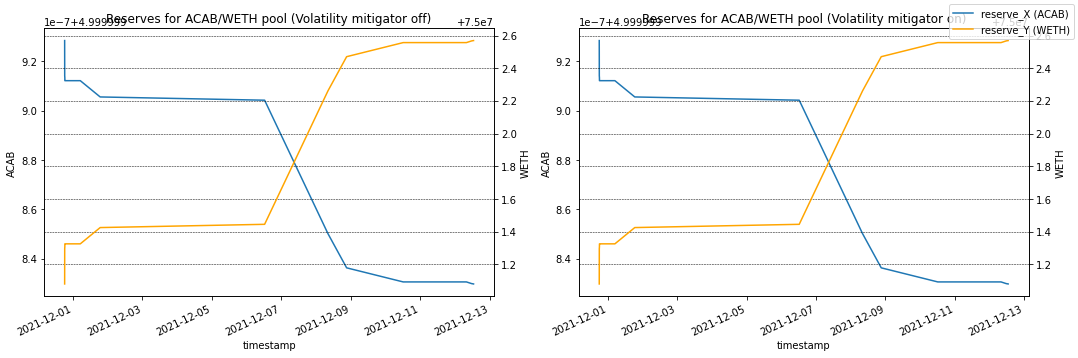

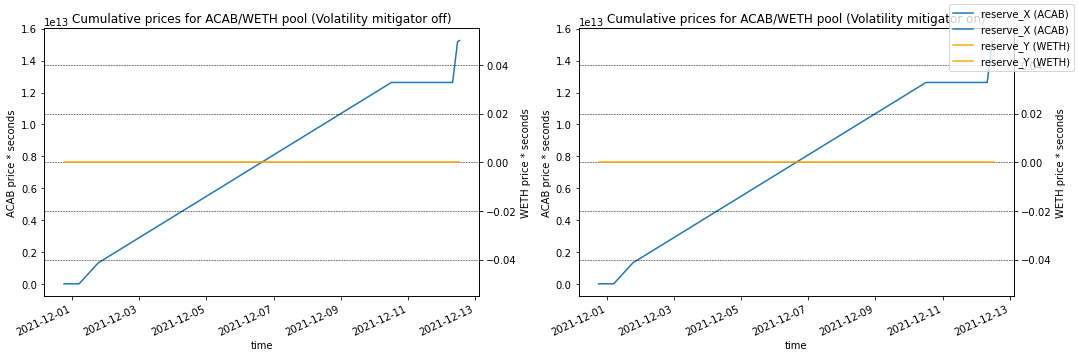

In [10]:
acab_weth_sim.show_mitigation_comparison(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_on_df)
acab_weth_sim.px_hist_blocked_transactions_slice(acab_weth_swaps_mitigation_on_df)
acab_weth_sim.px_hist_blocked_transactions_difference_from_oracle(acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_slice_distribution_and_diff_limit_line(acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_reserves_with_and_without_mitigation(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_cumulative_prices_with_and_without_mitigation(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_on_df)

amount of available mints without mitigation 1
amount of available records in mitigated dataset 1


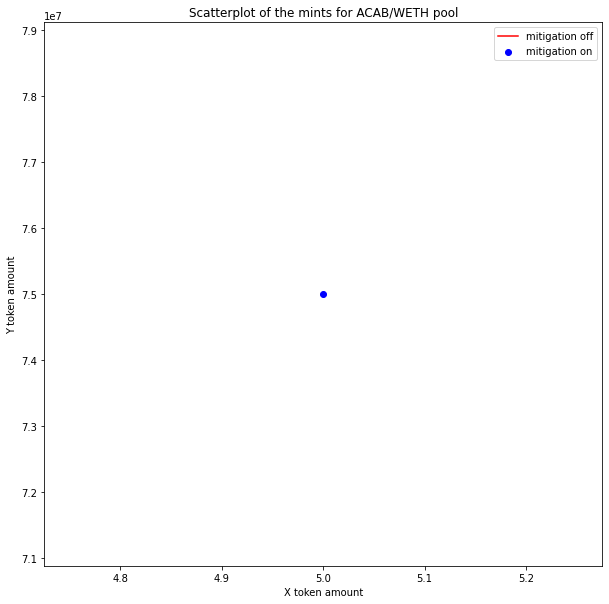

In [11]:
print(f"amount of available mints without mitigation {len(acab_weth_mints_mitigation_off_df)}")
print(f"amount of available records in mitigated dataset {len(acab_weth_mints_mitigation_on_df)}")

plot_mints(acab_weth_mints_mitigation_on_df, acab_weth_mints_mitigation_off_df)

Line is covered by the presented dot, meaning that mints are the same in mitigated and non mitigated datasets.

In [12]:
acab_weth_swaps_mitigation_on_df

,id,token_in,token_out,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,txd,sender,to,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff
0,1,WETH,ACAB,1.084038e+00,0.0,7.154652e-08,0.004336,CANT_CONSULT_ORACLE,NaN,NaN,NaN,NaN,SUCCESS,5.0,2021-11-30 18:13:36,2021-11-30 18:13:34,0x0e4a2cb4b6e605ca86bcb85b54711b9b6359e2e8203d...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x3ca17003820f7ebcd1ae70e24adea904590657e9,1,5.0,7.500000e+07,3.750000e+08,0,0,True,5.0,7.500000e+07,3.750000e+08,0,0,True,1.500000e+07,2.870533e-08
1,2,WETH,ACAB,2.167916e-01,0.0,1.430825e-08,0.000867,CHECKED,1.445277e-08,1.0,1.0,1.0,SUCCESS,15.0,2021-11-30 18:16:06,2021-11-30 18:15:57,0xf7a8942eb0c94ee50f258bdf9347ce7e58be98040559...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x6180441027cc27f63d3d25c43618199839f3570e,2,5.0,7.500000e+07,3.750000e+08,0,0,True,5.0,7.500000e+07,3.750000e+08,2250000064,0,True,1.500000e+07,5.740642e-09
2,3,WETH,ACAB,1.062972e-02,0.0,7.015616e-10,0.000043,CHECKED,7.086481e-10,1.0,1.0,1.0,SUCCESS,35.0,2021-11-30 18:21:06,2021-11-30 18:21:03,0xac16310193e3b07e21c2c14e69e72599a5441cb924ac...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x947d804dd60a6b6acade29e904177c0d3b1dca0c,3,5.0,7.500000e+07,3.750000e+08,2250000064,0,True,5.0,7.500000e+07,3.750000e+08,6750000219,0,True,1.500000e+07,2.814751e-10
3,4,WETH,ACAB,1.900000e-02,0.0,1.254000e-09,0.000076,CHECKED,1.266667e-09,1.0,1.0,1.0,SUCCESS,43.0,2021-11-30 18:23:06,2021-11-30 18:22:57,0x4e826df4738df9370364b682717992e0e6dd35b25b0a...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,4,5.0,7.500000e+07,3.750000e+08,6750000219,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,5.031199e-10
4,5,ACAB,WETH,2.115711e+06,0.0,7.499982e+07,NaN,NOT_REACHED,NaN,NaN,NaN,NaN,NOT_ENOUGH_RESERVES,164.0,2021-11-30 18:53:21,2021-11-30 18:53:11,0x464e0dcf1cbdcf11156bceaefbf0607ba627114bf6d9...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x06da0fd433c1a5d7a4faa01111c044910a184553,5,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,0.000000e+00
5,6,ACAB,WETH,1.773775e+05,0.0,7.499787e+07,NaN,NOT_REACHED,NaN,NaN,NaN,NaN,NOT_ENOUGH_RESERVES,545.0,2021-11-30 20:28:36,2021-11-30 20:28:25,0x0d3a2cc8476818124add83860cc0d7e7c3a5d39074a6...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,6,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,0.000000e+00
6,7,ACAB,WETH,1.333034e+07,0.0,7.499997e+07,NaN,NOT_REACHED,NaN,NaN,NaN,NaN,NOT_ENOUGH_RESERVES,2601.0,2021-12-01 05:02:36,2021-12-01 05:02:29,0x30cc6be280e3c3c231c87eeb786877e412ef2cde44c9...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,7,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,1.500000e+07,0.000000e+00
7,8,WETH,ACAB,1.000000e-01,0.0,6.600000e-09,0.000400,CHECKED,6.666666e-09,1.0,1.0,1.0,SUCCESS,5898.0,2021-12-01 18:46:51,2021-12-01 18:46:48,0x93911f23a326c1fb11461c75f2f045f92545219b8b21...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdb12ac354cf6ed2f4f92941929adf38fc923db78,8,5.0,7.500000e+07,3.750000e+08,8550000282,0,True,5.0,7.500000e+07,3.750000e+08,1325925046693,0,True,1.500000e+07,2.648000e-09
8,9,WETH,ACAB,2.000000e-02,0.0,1.320000e-09,0.000080,CANT_CONSULT_ORACLE,NaN,NaN,NaN,NaN,SUCCESS,33174.0,2021-12-06 12:25:51,2021-12-06 12:25:51,0xc4d1456261b5f0fd54aa10a41a707f26869976e8b7ad...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x0c8351929dd1a1a469805f6a0fae888fc8cb7b6b,9,5.0,7.500000e+07,3.750000e+08,132592

# CAT/WETH pool

The problem behind this pool is that there are only 45 transactions performed between October 2021 and November 2021. Even with this situation there are only 6 transactions when simulation was not able to consult with Oracle.

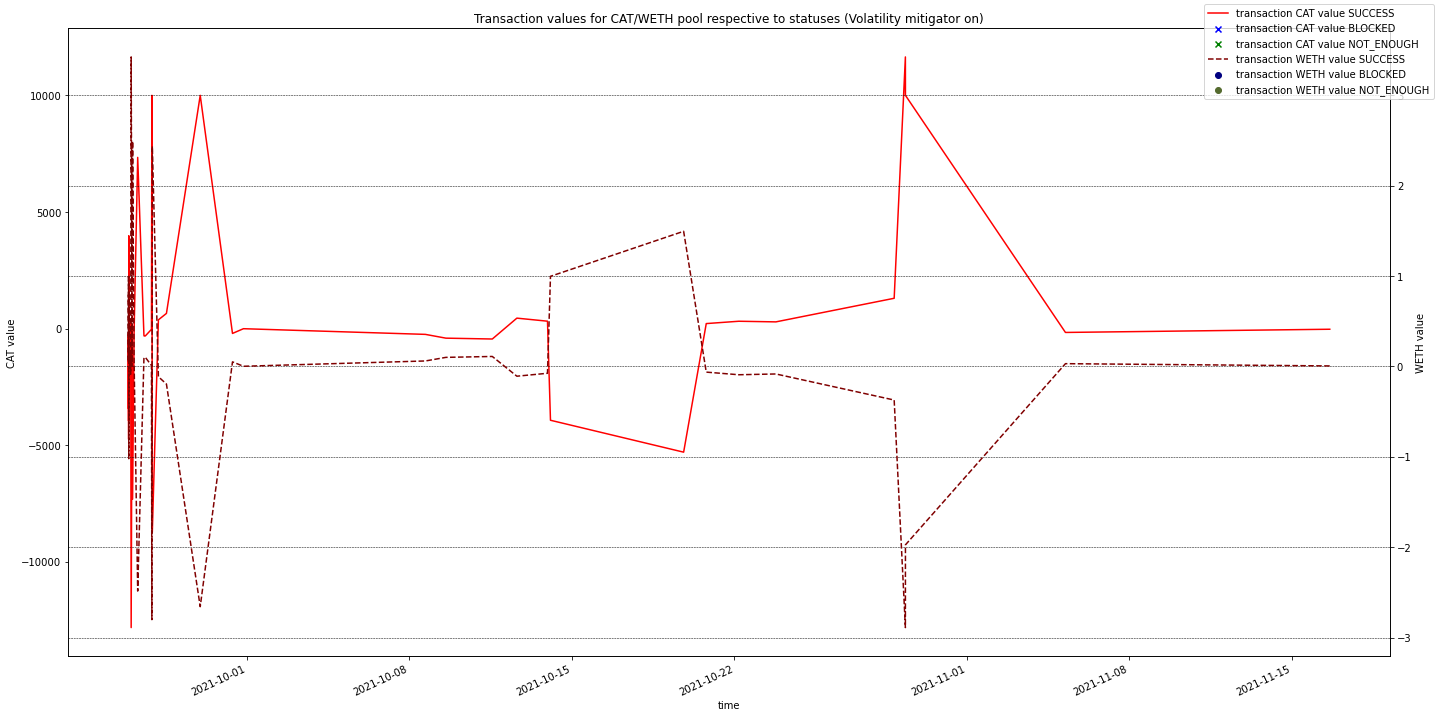

In [13]:
cat_weth_sim.plot_transactions_by_type(cat_weth_swaps_mitigation_on_df, ignoreSuccess=False, width=20, height=10)

Original CAT/WETH pool has next statuses counts:
SUCCESS    45
Name: status, dtype: int64
Mitigated CAT/WETH dataframe has next statuses counts:
SUCCESS    45
Name: status, dtype: int64
TWAP unavailability ratio for CAT/WETH is 0.13333333333333333
Mitigated CAT/WETH dataframe has next Mitigator statuses:
CHECKED                39
CANT_CONSULT_ORACLE     6
Name: mitigator_check_status, dtype: int64


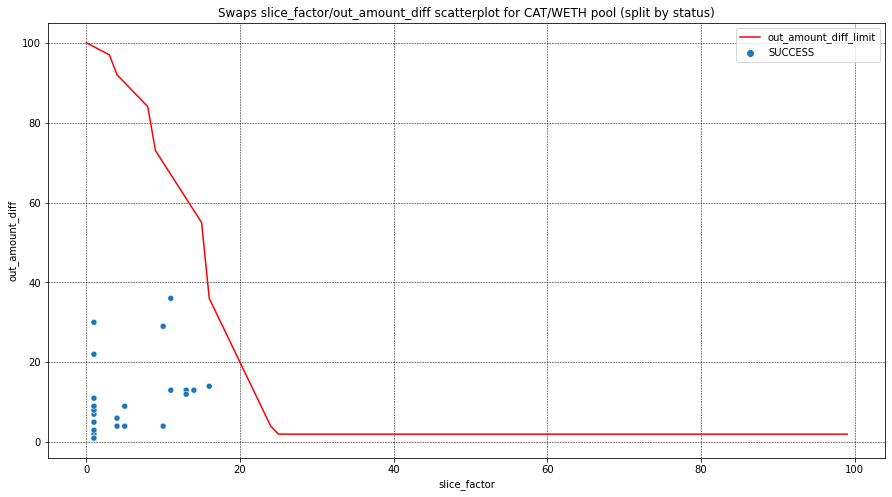

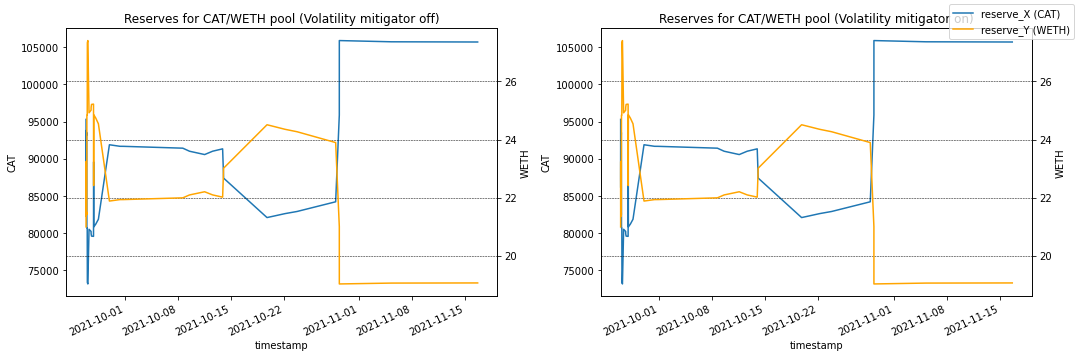

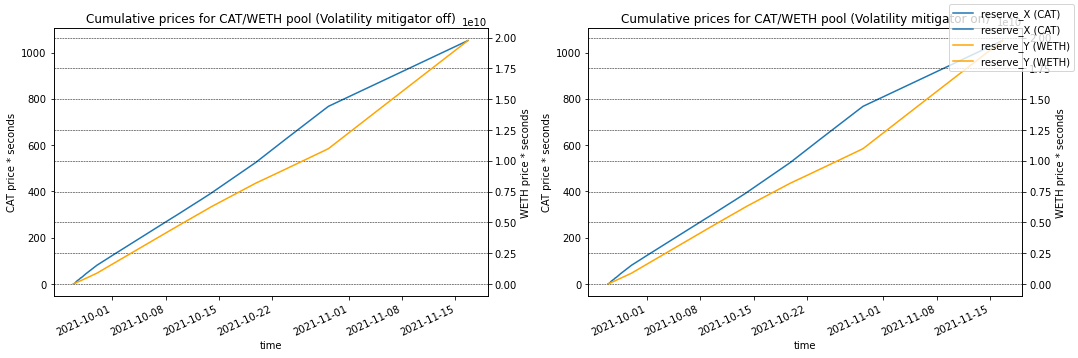

In [14]:
cat_weth_sim.show_mitigation_comparison(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_on_df)
cat_weth_sim.px_hist_blocked_transactions_slice(cat_weth_swaps_mitigation_on_df)
cat_weth_sim.px_hist_blocked_transactions_difference_from_oracle(cat_weth_swaps_mitigation_on_df)
cat_weth_sim.plot_slice_distribution_and_diff_limit_line(cat_weth_swaps_mitigation_on_df)
cat_weth_sim.plot_reserves_with_and_without_mitigation(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_on_df)
cat_weth_sim.plot_cumulative_prices_with_and_without_mitigation(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_off_df)

# DOG/WETH

In the current pool out of all 18559 transactions there is only one transaction blocked with strange values of incoming and outcoming tokens and only 2 transactions when algorithm was not able to consult Oracle.

In [15]:
dog_weth_swaps_mitigation_on_df[dog_weth_swaps_mitigation_on_df.status == 'BLOCKED_BY_VOLATILITY_MITIGATION']

,id,token_in,token_out,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,txd,sender,to,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff
6765,6801,DOG,WETH,166600000.0,0.0,583.972499,NaN,CHECKED,782.688985,29.0,21.0,84.0,BLOCKED_BY_VOLATILITY_MITIGATION,31497.0,2021-09-08 06:12:54,2021-09-08 06:12:46,0x8663245b797280b19ab1c6e8b5fc41159179973ef34e...,0x27239549dd40e1d60f5b80b0c4196923745b1fd2,0x27239549dd40e1d60f5b80b0c4196923745b1fd2,6801,8.014858e+08,3421.747899,2.742482e+12,3,77430218708,True,8.014858e+08,3421.747899,2.742482e+12,3,77454813157,True,0.000004,0.0


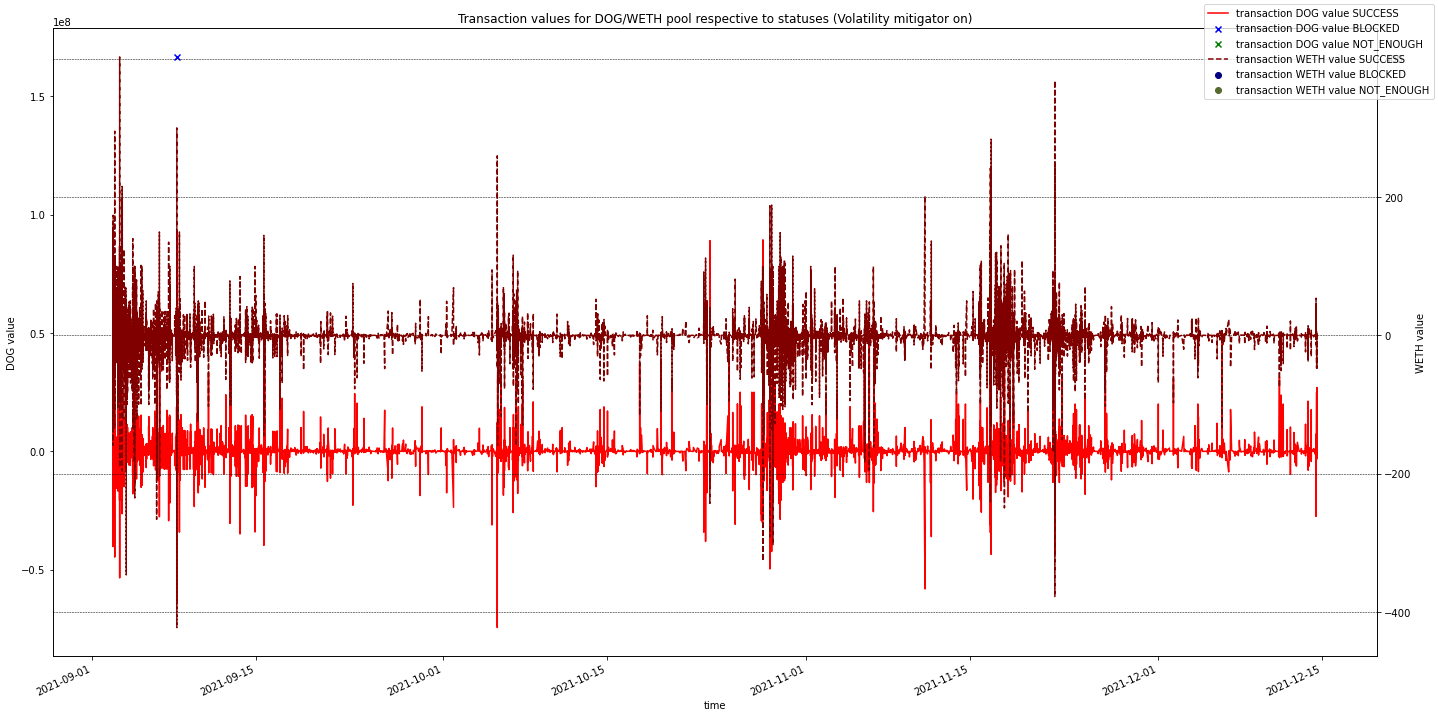

In [16]:
dog_weth_sim.plot_transactions_by_type(dog_weth_swaps_mitigation_on_df, ignoreSuccess=False, width=20, height=10)

Original DOG/WETH pool has next statuses counts:
SUCCESS    18559
Name: status, dtype: int64
Mitigated DOG/WETH dataframe has next statuses counts:
SUCCESS                             18558
BLOCKED_BY_VOLATILITY_MITIGATION        1
Name: status, dtype: int64
TWAP unavailability ratio for DOG/WETH is 0.00010776442696265962
Mitigated DOG/WETH dataframe has next Mitigator statuses:
CHECKED                18557
CANT_CONSULT_ORACLE        2
Name: mitigator_check_status, dtype: int64


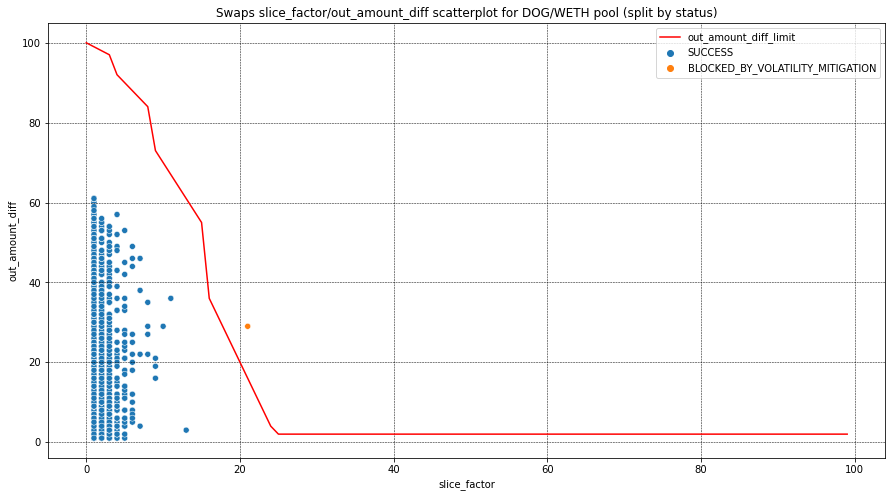

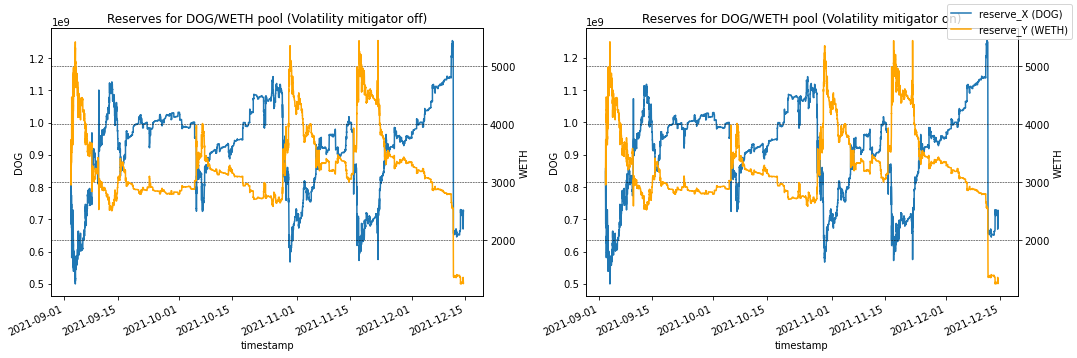

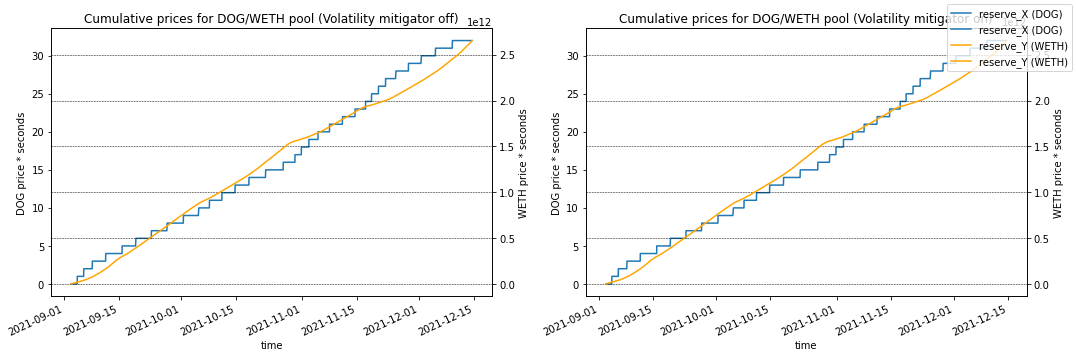

In [17]:
dog_weth_sim.show_mitigation_comparison(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_on_df)
dog_weth_sim.px_hist_blocked_transactions_slice(dog_weth_swaps_mitigation_on_df)
dog_weth_sim.px_hist_blocked_transactions_difference_from_oracle(dog_weth_swaps_mitigation_on_df)
dog_weth_sim.plot_slice_distribution_and_diff_limit_line(dog_weth_swaps_mitigation_on_df)
dog_weth_sim.plot_reserves_with_and_without_mitigation(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_on_df)
dog_weth_sim.plot_cumulative_prices_with_and_without_mitigation(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_off_df)

# LADY/WETH



In [18]:
lady_weth_swaps_mitigation_on_df

,id,token_in,token_out,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,txd,sender,to,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff
0,1,WETH,LADY,1.000000e+00,0.0,9.583737e+06,0.004000,CANT_CONSULT_ORACLE,NaN,NaN,NaN,NaN,SUCCESS,4.0,2021-08-29 11:25:27,2021-08-29 11:25:18,0xc7766d3f939528928028325146a18b153f2f928a9871...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x2ccf8a67fe50bccb6a36b0814463818c75cabeea,1,3.000000e+08,30.000000,9.000000e+09,0,0,True,2.904163e+08,30.996000,9.001742e+09,0,0,True,1.067296e-07,0.067296
1,2,LADY,WETH,5.525459e+07,0.0,4.912937e+00,0.019652,CANT_CONSULT_ORACLE,NaN,NaN,NaN,NaN,SUCCESS,4.0,2021-08-29 11:25:27,2021-08-29 11:25:18,0x590f5bf59376aa63f199320d56b6559bb80790884e35...,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0000000000d41c96294ccdac8612bdfe29c641af,2,2.904163e+08,30.996000,9.001742e+09,0,0,True,3.456709e+08,26.063411,9.009362e+09,0,0,True,7.539950e-08,-0.293546
2,3,WETH,LADY,6.793286e+00,0.0,7.090107e+07,0.027173,CANT_CONSULT_ORACLE,NaN,NaN,NaN,NaN,SUCCESS,4.0,2021-08-29 11:25:27,2021-08-29 11:25:18,0xbf2bab3504a6fffbe17c5fbc1a5721f0110a16eb3c3d...,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0000000000d41c96294ccdac8612bdfe29c641af,3,3.456709e+08,26.063411,9.009362e+09,0,0,True,2.747698e+08,32.829524,9.020561e+09,0,0,True,1.194801e-07,0.584627
3,4,LADY,WETH,5.438918e+07,0.0,5.379288e+00,0.021517,CHECKED,6.498425e+00,18.0,20.0,80.0,SUCCESS,9.0,2021-08-29 11:26:42,2021-08-29 11:26:29,0xec452cd5330f8d9005ceb56ba18a4132a3c178cf1665...,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0000000000d41c96294ccdac8612bdfe29c641af,4,2.747698e+08,32.829524,9.020561e+09,0,0,True,3.291590e+08,27.428719,9.028408e+09,0,627719535,True,8.332970e-08,-0.302564
4,5,WETH,LADY,1.500000e+00,0.0,1.690551e+07,0.006000,CHECKED,1.255439e+07,29.0,6.0,12.0,SUCCESS,9.0,2021-08-29 11:26:42,2021-08-29 11:26:29,0x74cc84de7e23a6a4d8d9e6b7b5c5cbb651aae2fe62ec...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x2ccf8a67fe50bccb6a36b0814463818c75cabeea,5,3.291590e+08,27.428719,9.028408e+09,0,627719535,True,3.122535e+08,28.922719,9.031219e+09,0,627719535,True,9.262578e-08,0.111558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,1732,WETH,LADY,3.000000e-03,0.0,1.589900e+04,0.000012,CANT_CONSULT_ORACLE,NaN,NaN,NaN,NaN,SUCCESS,582269.0,2021-12-08 13:31:42,2021-12-08 13:31:33,0x65f4e0b897bf8d1755febb36798ec5fc5abf770c4d1a...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xd56d8139d11abd9209116fbf675f1a8f3ac2285c,1732,2.242834e+08,41.894097,9.396150e+09,1,40598539116364,True,2.242675e+08,41.897085,9.396154e+09,1,43086427969102,True,1.868175e-07,0.000142
1732,1733,LADY,WETH,5.697393e+05,0.0,1.051085e-01,0.000420,CHECKED,1.064373e-01,1.0,1.0,1.0,SUCCESS,593710.0,2021-12-10 13:11:57,2021-12-10 13:11:51,0x64b8d3da0c2327a0a2125963e2e3d7ada5b4527b09c5...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,1733,2.242675e+08,41.897085,9.396154e+09,1,43086427969102,True,2.248372e+08,41.791556,9.396298e+09,1,44005051924950,True,1.858747e-07,-0.005046
1733,1734,WETH,LADY,1.000000e-02,0.0,5.324907e+04,0.000040,CHECKED,5.379968e+04,1.0,1.0,1.0,SUCCESS,593941.0,2021-12-10 14:09:42,2021-12-10 14:09:35,0xcc48a5316bf2f41d02fa0e52f118b42bd8a323219286...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x411ed5fbc0be25c5c03945ac4a29585cd91153b3,1734,2.248372e+08,41.791556,9.396298e+09,1,44005051924950,True,2.247840e+08,41.801516,9.396311e+09,1,44023693513996,True,1.859631e-07,0.000475
1734,1735,WETH,LADY,1.883020e-03,0.0,1.002407e+04,0.000008,CHECKED,1.012578e+04,1.0,1.0,1.0,S

In [19]:
lady_weth_mints_mitigation_on_df

,id,X_amount,Y_amount,timestamp,status,block_number,block_timestamp,transaction_timestamp,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on
0,0,300000000.0,30.0,1630236267,SUCCESS,0,1630236267,1630236267,0,0.0,0.0,0.0,0,0,True,300000000.0,30.0,9.000000e+09,0,0,True


In [20]:
lady_weth_burns_mitigation_on_df

,id,X_amount,Y_amount,timestamp,status,block_number,block_timestamp,transaction_timestamp,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,transaction_id,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on


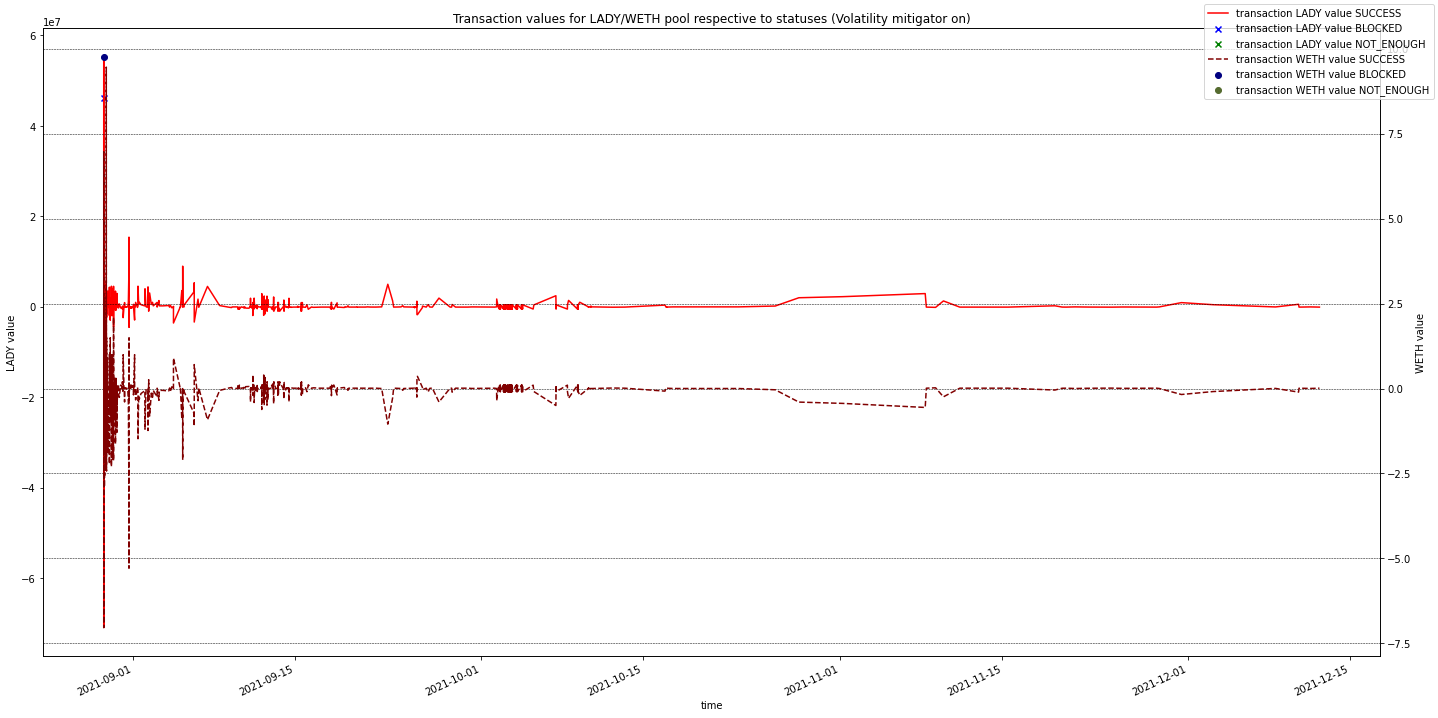

In [21]:
lady_weth_sim.plot_transactions_by_type(lady_weth_swaps_mitigation_on_df, ignoreSuccess=False, width=20, height=10)

Original LADY/WETH pool has next statuses counts:
SUCCESS    1736
Name: status, dtype: int64
Mitigated LADY/WETH dataframe has next statuses counts:
SUCCESS                             1734
BLOCKED_BY_VOLATILITY_MITIGATION       2
Name: status, dtype: int64
TWAP unavailability ratio for LADY/WETH is 0.008064516129032258
Mitigated LADY/WETH dataframe has next Mitigator statuses:
CHECKED                1722
CANT_CONSULT_ORACLE      14
Name: mitigator_check_status, dtype: int64


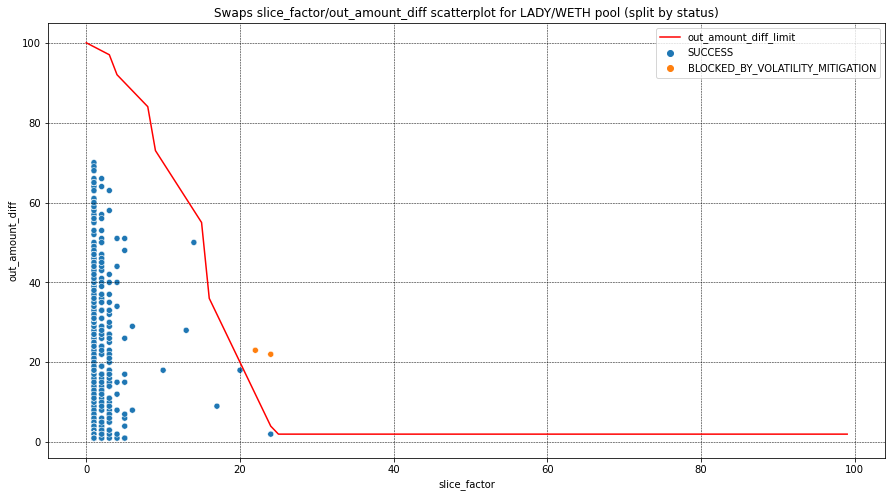

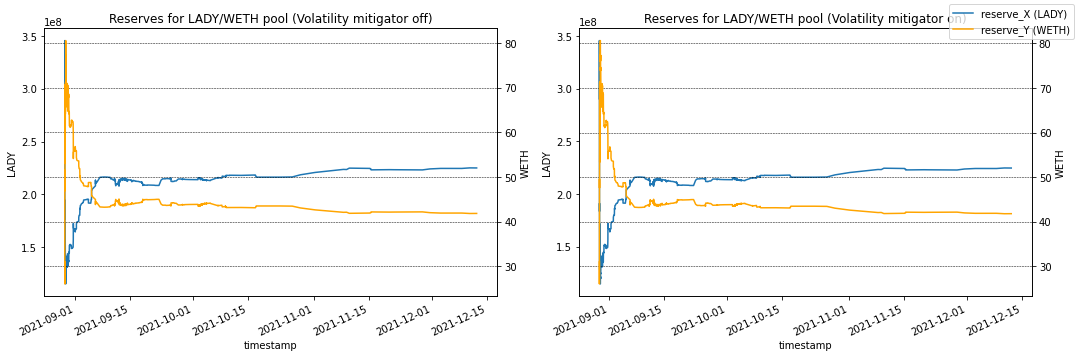

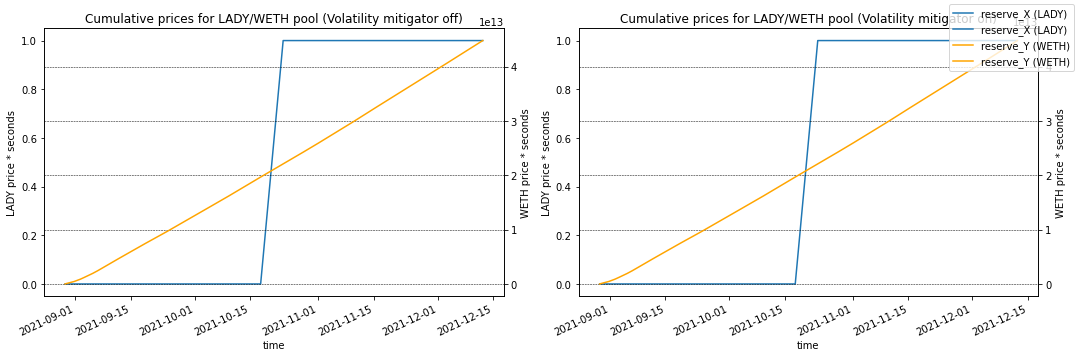

In [22]:
lady_weth_sim.show_mitigation_comparison(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_on_df)
lady_weth_sim.px_hist_blocked_transactions_slice(lady_weth_swaps_mitigation_on_df)
lady_weth_sim.px_hist_blocked_transactions_difference_from_oracle(lady_weth_swaps_mitigation_on_df)
lady_weth_sim.plot_slice_distribution_and_diff_limit_line(lady_weth_swaps_mitigation_on_df)
lady_weth_sim.plot_reserves_with_and_without_mitigation(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_on_df)
lady_weth_sim.plot_cumulative_prices_with_and_without_mitigation(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_off_df)

# NFD/WETH

In [23]:
nfd_weth_mints_mitigation_on_df

,id,X_amount,Y_amount,timestamp,status,block_number,block_timestamp,transaction_timestamp,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on
0,0,5.000000e+09,25.000000,1629388020,SUCCESS,0,1629388020,1629388020,0,0.000000e+00,0.000000,0.000000e+00,0,0,True,5.000000e+09,25.000000,1.250000e+11,0,0,True
1,431,5.000000e+09,77.939140,1629407285,SUCCESS,1285,1629407295,1629407285,431,2.295260e+09,56.578566,1.298625e+11,0,705249622682,True,7.295260e+09,134.517706,9.813416e+11,0,705249622682,True
2,805,8.762175e+06,0.350000,1629441713,SUCCESS,3580,1629441720,1629441713,805,4.958824e+09,201.277777,9.981010e+11,0,1596818068278,True,4.967586e+09,201.627777,1.001603e+12,0,1596818068278,True
3,912,1.015455e+10,100.000000,1629489764,SUCCESS,6783,1629489765,1629489764,912,6.389343e+09,157.393099,1.005639e+12,0,3042360214778,True,1.654389e+10,257.393099,4.258284e+12,0,3042360214778,True
4,1042,2.749563e+06,0.081010,1629492196,SUCCESS,6946,1629492210,1629492196,1042,1.200222e+10,356.594851,4.279930e+12,0,3153825143787,True,1.200497e+10,356.675861,4.281883e+12,0,3153825143787,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,16309,5.102248e+07,3.419492,1633864226,SUCCESS,298414,1633864230,1633864226,16309,1.354185e+10,902.731588,1.222466e+13,0,61387895374018,True,1.359287e+10,906.151080,1.231720e+13,0,61387895374018,True
61,16779,3.562631e+05,0.035895,1635192601,SUCCESS,386973,1635192615,1635192601,16779,1.244743e+10,987.485903,1.229166e+13,0,81722006451458,True,1.244779e+10,987.521799,1.229246e+13,0,81722006451458,True
62,17265,1.570025e+07,2.590341,1635465655,SUCCESS,405176,1635465660,1635465655,17265,9.994140e+09,1236.626582,1.235902e+13,0,84714839226506,True,1.000984e+10,1239.216923,1.240436e+13,0,84714839226506,True
63,17314,2.796319e+07,3.700190,1635484944,SUCCESS,406462,1635484950,1635484944,17314,1.031115e+10,1203.764274,1.241219e+13,0,84872196121310,True,1.033911e+10,1207.464464,1.248411e+13,0,84872196121310,True


In [24]:
nfd_weth_burns_mitigation_on_df

,id,X_amount,Y_amount,timestamp,status,block_number,block_timestamp,transaction_timestamp,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on
0,14224,2.840204e+06,13.199229,1630618029,SUCCESS,82001,1630618035,1630618029,14224,9.170583e+09,1390.031053,1.274739e+13,0,12917329472727,True,9.167742e+09,1.376832e+03,1.262244e+13,0,12917329472727,True
1,14262,5.464182e+04,0.298246,1630622882,SUCCESS,82325,1630622895,1630622882,14262,9.583133e+09,1318.120198,1.263172e+13,0,12955527695701,True,9.583078e+09,1.317822e+03,1.262879e+13,0,12955527695701,True
2,14523,1.183244e+05,1.012607,1630683931,SUCCESS,86395,1630683945,1630683931,14523,1.064797e+10,1191.351512,1.268547e+13,0,13417141316895,True,1.064785e+10,1.190339e+03,1.267455e+13,0,13417141316895,True
3,14641,1.173057e+05,0.869720,1630754815,SUCCESS,91120,1630754820,1630754815,14641,1.084411e+10,1169.732432,1.268471e+13,0,14059481474576,True,1.084400e+10,1.168863e+03,1.267514e+13,0,14059481474576,True
4,14671,1.303380e+06,8.239186,1630777314,SUCCESS,92620,1630777320,1630777314,14671,1.130810e+10,1122.013543,1.268785e+13,0,14283304692787,True,1.130680e+10,1.113774e+03,1.259322e+13,0,14283304692787,True
5,14687,7.341154e+06,48.075311,1630783830,SUCCESS,93054,1630783830,1630783830,14687,1.131935e+10,1112.732835,1.259542e+13,0,14331244905065,True,1.131201e+10,1.064658e+03,1.204342e+13,0,14331244905065,True
6,14737,2.115522e+05,1.494807,1630829980,SUCCESS,96131,1630829985,1630829980,14737,1.137127e+10,1059.497211,1.204783e+13,0,14807460966884,True,1.137106e+10,1.058002e+03,1.203060e+13,0,14807460966884,True
7,14833,1.677401e+05,0.957953,1630928987,SUCCESS,102732,1630929000,1630928987,14833,1.149496e+10,1050.752374,1.207836e+13,0,15914482586110,True,1.149480e+10,1.049794e+03,1.206717e+13,0,15914482586110,True
8,14839,4.871057e+05,2.610115,1630936218,SUCCESS,103214,1630936230,1630936218,14839,1.150925e+10,1048.494022,1.206738e+13,0,15967934901457,True,1.150876e+10,1.045884e+03,1.203683e+13,0,15967934901457,True
9,14878,2.230418e+05,1.097538,1630950878,SUCCESS,104191,1630950885,1630950878,14878,1.154511e+10,1042.990213,1.204144e+13,0,16150884243716,True,1.154489e+10,1.041893e+03,1.202853e+13,0,16150884243716,True


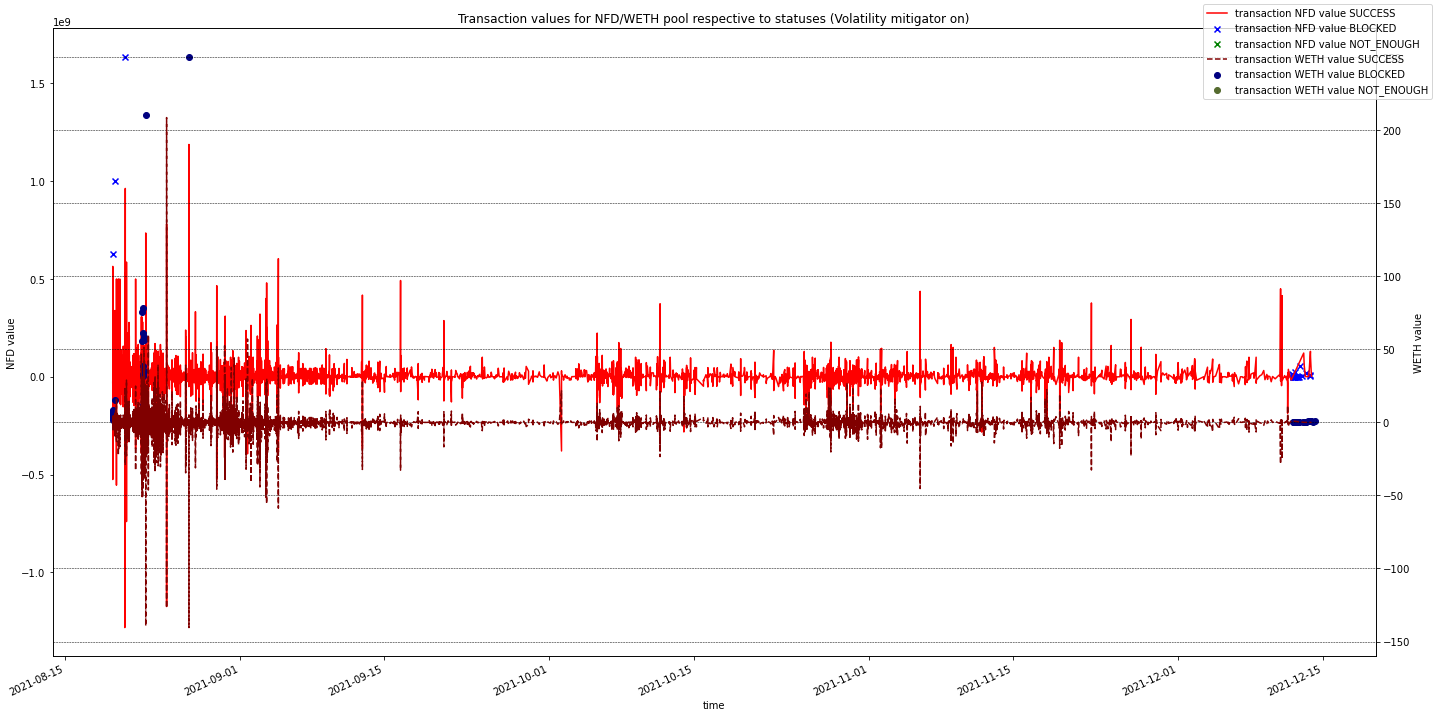

In [25]:
nfd_weth_sim.plot_transactions_by_type(nfd_weth_swaps_mitigation_on_df, ignoreSuccess=False, width=20, height=10)

In [26]:
nfd_weth_swaps_mitigation_on_df

,id,token_in,token_out,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,txd,sender,to,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff
0,1,WETH,NFD,1.500000e-01,0.0,2.952462e+07,6.000000e-04,CANT_CONSULT_ORACLE,NaN,NaN,NaN,NaN,SUCCESS,47.0,2021-08-19 15:58:45,2021-08-19 15:58:34,0x4f7b97ebaa78233ebd9945c8bba75f2d83705577cbdc...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x92334fb1795b68ea871f5850ea7c98668587ae26,1,5.000000e+09,2.500000e+01,1.250000e+11,0,0,True,4.970475e+09,2.514940e+01,1.250045e+11,0,0,True,5.059757e-09,0.011951
1,2,WETH,NFD,1.000000e-01,0.0,1.948944e+07,4.000000e-04,CHECKED,1.976379e+07,1.0,1.0,1.0,SUCCESS,64.0,2021-08-19 16:03:00,2021-08-19 16:02:52,0x285e54c1e7c856edef51dd523751255fbdc879d8e2b2...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xa69f670ea591f11bed8de61ce0e3c014c849feda,2,4.970475e+09,2.514940e+01,1.250045e+11,0,0,True,4.950986e+09,2.524900e+01,1.250074e+11,0,50397672347,True,5.099792e-09,0.007912
2,3,WETH,NFD,1.000000e+00,0.0,1.868012e+08,4.000000e-03,CHECKED,1.969656e+08,5.0,4.0,8.0,SUCCESS,77.0,2021-08-19 16:06:15,2021-08-19 16:06:08,0x460c8a36f57fd91d08fe6fc11c8dfc3dfbb80433134e...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x0eb96d5ec478b68ff0d48628ab4df6a63c21ddaa,3,4.950986e+09,2.524900e+01,1.250074e+11,0,50397672347,True,4.764185e+09,2.624500e+01,1.250360e+11,0,88634523647,True,5.508812e-09,0.080203
3,4,WETH,NFD,1.370000e+00,0.0,2.341072e+08,5.480000e-03,CHECKED,2.673546e+08,13.0,6.0,12.0,SUCCESS,81.0,2021-08-19 16:07:15,2021-08-19 16:07:04,0xb75ef43b273a51ade02734ef4bfc15ca41500a520e97...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0x4b6760682191de7e476b801b7ab42d8e8a5b041a,4,4.764185e+09,2.624500e+01,1.250360e+11,0,88634523647,True,4.530078e+09,2.760952e+01,1.250733e+11,0,99526163419,True,6.094712e-09,0.106357
4,5,WETH,NFD,1.000000e+00,0.0,1.568130e+08,4.000000e-03,CHECKED,1.926299e+08,20.0,4.0,8.0,SUCCESS,84.0,2021-08-19 16:08:00,2021-08-19 16:07:49,0xeea6effb95283ee541079e8c4357126bb337e04b1f8b...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xec7b7a7d8e5427e38c1cf57488c1d652924ff65a,5,4.530078e+09,2.760952e+01,1.250733e+11,0,99526163419,True,4.373265e+09,2.860552e+01,1.250995e+11,0,106909612649,True,6.540999e-09,0.073225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18773,18893,WETH,NFD,8.096322e-01,0.0,1.365436e+10,NaN,CHECKED,1.090133e+22,199.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,669132.0,2021-12-13 19:50:00,2021-12-13 19:49:52,0x52de134c9d4e7fedc1020f41b1abbb37817c07d38647...,0xccfa24354a7dd35addc70affcf9a18d7bf1f199a,0xccfa24354a7dd35addc70affcf9a18d7bf1f199a,18893,1.365436e+10,9.680750e-13,1.321845e-02,0,2158584590330698493128799669,True,1.365436e+10,9.680750e-13,1.321845e-02,0,2160488718890673631012830892,True,7.089857e-23,0.000000
18774,18894,NFD,WETH,5.682729e+06,0.0,3.980000e-16,1.000000e-18,CHECKED,4.240000e-16,6.0,1.0,1.0,SUCCESS,669613.0,2021-12-13 21:50:15,2021-12-13 21:50:05,0x48dd1030deaae7573557a39d0a9f6d7049dbdf449a76...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,18894,1.365436e+10,9.680750e-13,1.321845e-02,0,2160488718890673631012830892,True,1.366005e+10,9.676760e-13,1.321850e-02,0,2262253811929344889037166222,True,7.083987e-23,-0.000828
18775,18895,NFD,WETH,2.690847e+06,0.0,1.880000e-16,0.000000e+00,CHECKED,1.980000e-16,5.0,1.0,1.0,SUCCESS,669694.0,2021-12-13 22:10:30,2021-12-13 22:10:25,0xa370477f2f4e05c6ed9a03e8bc5d4a7a1c4fae8ef097...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,18895,1.366005e+10,9.676760e-13,1.321850e-02,0

Original NFD/WETH pool has next statuses counts:
SUCCESS                18751
NOT_ENOUGH_RESERVES       27
Name: status, dtype: int64
Mitigated NFD/WETH dataframe has next statuses counts:
SUCCESS                             18681
BLOCKED_BY_VOLATILITY_MITIGATION       97
Name: status, dtype: int64
TWAP unavailability ratio for NFD/WETH is 5.3253807647246777e-05
Mitigated NFD/WETH dataframe has next Mitigator statuses:
CHECKED                18777
CANT_CONSULT_ORACLE        1
Name: mitigator_check_status, dtype: int64


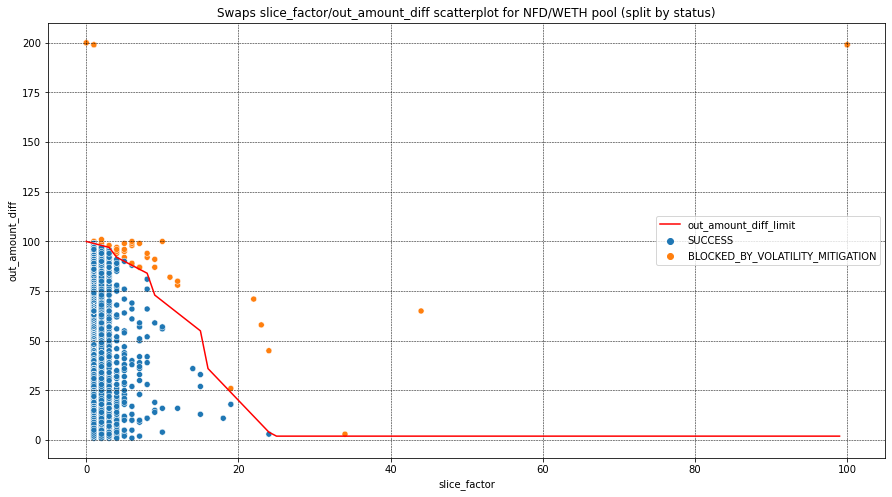

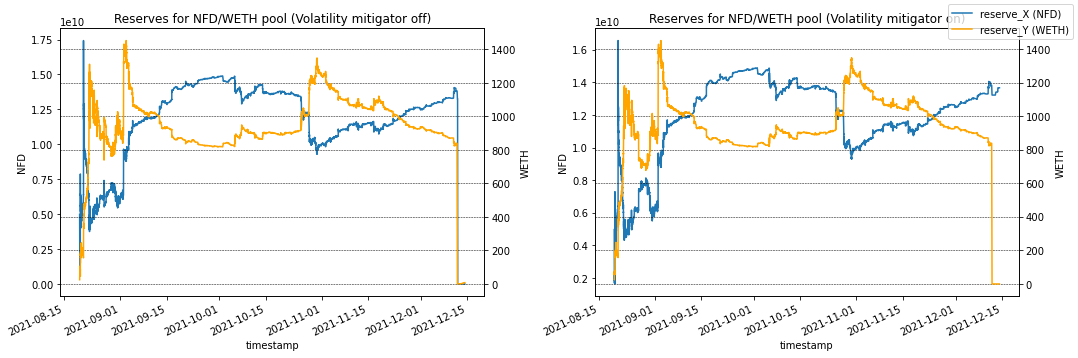

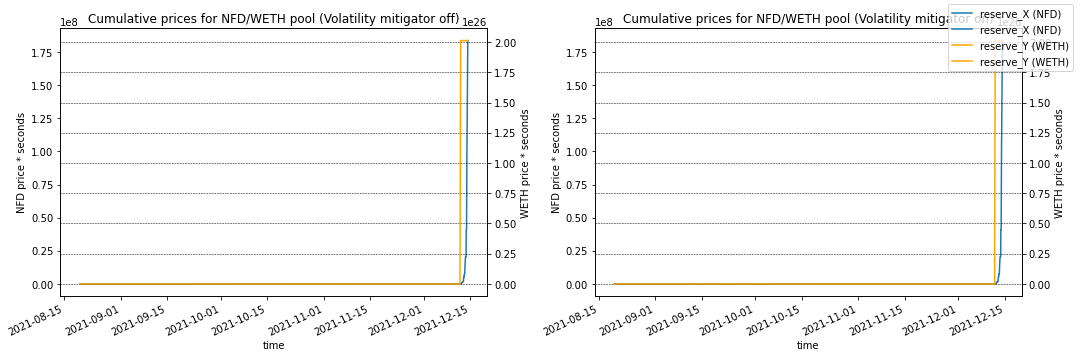

In [27]:
nfd_weth_sim.show_mitigation_comparison(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.px_hist_blocked_transactions_slice(nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.px_hist_blocked_transactions_difference_from_oracle(nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.plot_slice_distribution_and_diff_limit_line(nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.plot_reserves_with_and_without_mitigation(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.plot_cumulative_prices_with_and_without_mitigation(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_off_df, makeBigNumConvert=True)

# TIARA/WETH

In [28]:
tiara_weth_swaps_mitigation_on_df[tiara_weth_swaps_mitigation_on_df.status == 'BLOCKED_BY_VOLATILITY_MITIGATION']

,id,token_in,token_out,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,txd,sender,to,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff
1,2,$TIARA,WETH,139.984047,0.0,1.971697e+03,NaN,CHECKED,140004.898352,194.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,75.0,2021-08-10 03:53:58,2021-08-10 03:53:53,0x8ad8c1aa0c95c2161c4a7bd8cb31a7e1a0dbf611aff8...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,2,1.999852e+00,2000.149400,4.000002e+03,0,0,True,1.999852e+00,2000.149400,4.000002e+03,690102,0,True,1.000149e+03,0.0
2,3,$TIARA,WETH,139.145403,0.0,1.971528e+03,NaN,CHECKED,139166.129006,194.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,93.0,2021-08-10 03:58:28,2021-08-10 03:58:16,0xc62a4f438b1ec4eaba4cd942397222456e0fe49103c0...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,3,1.999852e+00,2000.149400,4.000002e+03,690102,0,True,1.999852e+00,2000.149400,4.000002e+03,960142,0,True,1.000149e+03,0.0
5,6,$TIARA,WETH,13.938633,0.0,1.748576e+03,NaN,CHECKED,13940.708742,155.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,116.0,2021-08-10 04:04:13,2021-08-10 04:04:08,0xca9370cbfda2d7cd74c62eed2545bdf4917e8c789d2a...,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,6,1.998230e+00,2001.781951,4.000021e+03,1305194,1,True,1.998230e+00,2001.781951,4.000021e+03,1305194,1,True,1.001777e+03,0.0
6,7,$TIARA,WETH,7.097912,0.0,1.558574e+03,NaN,CHECKED,7099.476956,127.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,120.0,2021-08-10 04:05:13,2021-08-10 04:05:12,0x75b2df96180509439595d2eb032fe84f44921b0738dc...,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,7,1.998230e+00,2001.781951,4.000021e+03,1305194,1,True,1.998230e+00,2001.781951,4.000021e+03,1365301,1,True,1.001777e+03,0.0
9,10,$TIARA,WETH,100.000000,0.0,1.964936e+03,NaN,CHECKED,100068.568906,192.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,131.0,2021-08-10 04:07:58,2021-08-10 04:07:52,0xd39489198f1d9f0a754b6ffc4476a3c52b928aae4ba9...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,10,1.995495e+00,2004.542350,4.000055e+03,1365301,1,True,1.995495e+00,2004.542350,4.000055e+03,1531049,1,True,1.004534e+03,0.0
11,12,$TIARA,WETH,100.000000,0.0,1.965038e+03,NaN,CHECKED,100112.866128,192.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,144.0,2021-08-10 04:11:13,2021-08-10 04:11:00,0x6b27308938a2174fbd7d465c15b803a8776ab084292b...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,12,1.995394e+00,2004.644261,4.000056e+03,1591321,1,True,1.995394e+00,2004.644261,4.000056e+03,1726946,1,True,1.004636e+03,0.0
12,13,$TIARA,WETH,100.000000,0.0,1.965038e+03,NaN,CHECKED,100130.256025,192.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,150.0,2021-08-10 04:12:43,2021-08-10 04:12:32,0x260fd03a7b242496b17d963fc73e2a664a4c2ec78c21...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,13,1.995394e+00,2004.644261,4.000056e+03,1726946,1,True,1.995394e+00,2004.644261,4.000056e+03,1817364,1,True,1.004636e+03,0.0
13,14,$TIARA,WETH,100.000000,0.0,1.965038e+03,NaN,CHECKED,100140.921828,192.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,154.0,2021-08-10 04:13:43,2021-08-10 04:13:39,0x393d3b10e8efc4ca060c5f7ba16840a01f97874d0761...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,14,1.995394e+00,2004.644261,4.000056e+03,1817364,1,True,1.995394e+00,2004.644261,4.000056e+03,1877642,1,True,1.004636e+03,0.0
14,15,$TIARA,WETH,100.000000,0.0,1.965038e+03,NaN,CHECKED,100148.483716,192.0,100.0,98.0,BL

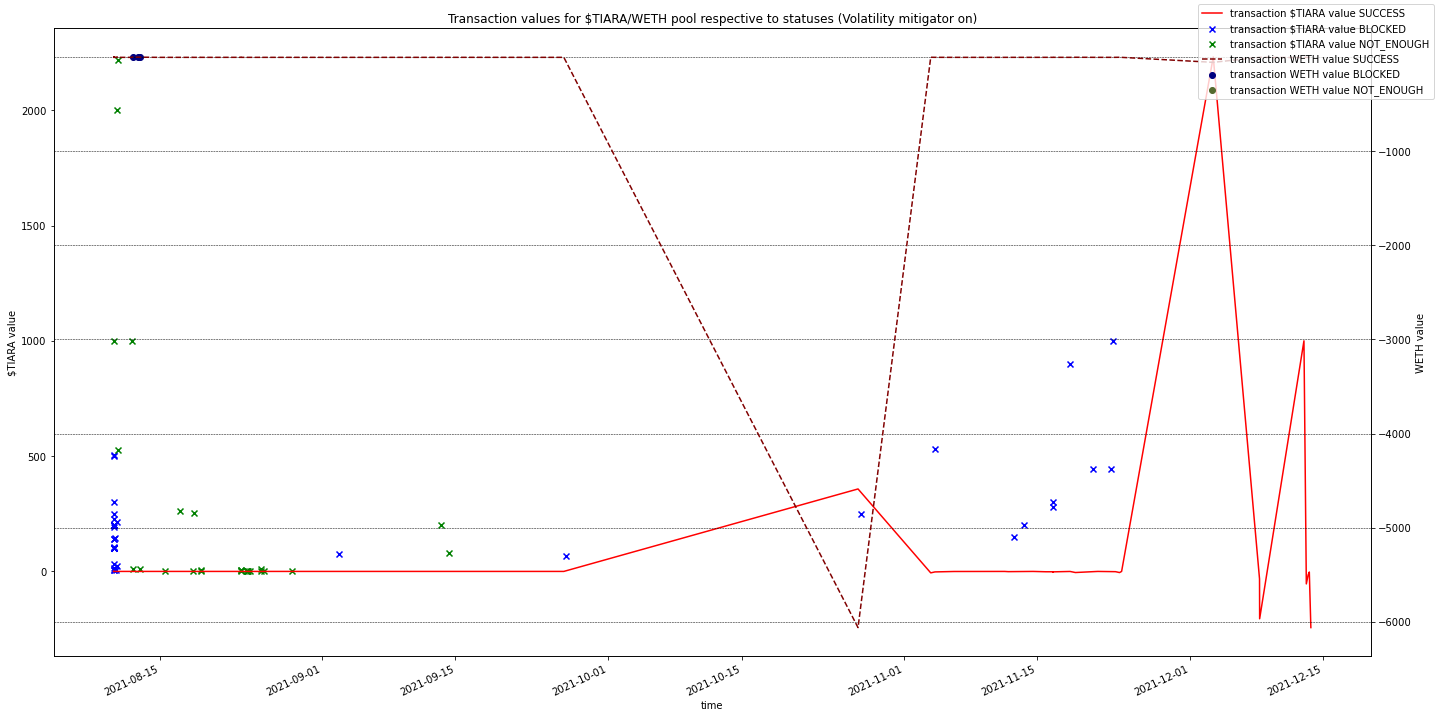

In [29]:
tiara_weth_sim.plot_transactions_by_type(tiara_weth_swaps_mitigation_on_df, ignoreSuccess=False, width=20, height=10)

In [30]:
tiara_weth_mints_mitigation_on_df

,id,X_amount,Y_amount,timestamp,status,block_number,block_timestamp,transaction_timestamp,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on
0,0,2.000000,2000.000000,1628566513,SUCCESS,0,1628566513,1628566513,0,0.000000e+00,0.000000,0.000000e+00,0,0,True,2.000000,2000.000000,4000.000000,0,0,True
1,134,0.300000,39.088231,1630543432,SUCCESS,131795,1630543438,1630543432,134,9.919830e-13,1079.949055,1.071291e-09,1679903614855631347374,167,True,0.300000,1119.037286,335.711186,1679903614855631347374,167,True
2,145,4.387672,5000.000000,1635203952,SUCCESS,442496,1635203953,1635203952,145,2.998961e-01,1119.427492,3.357119e+02,1679903614864456023339,801,True,4.687568,6119.427492,28685.232399,1679903614864456023339,801,True


In [31]:
tiara_weth_burns_mitigation_on_df

,id,X_amount,Y_amount,timestamp,status,block_number,block_timestamp,transaction_timestamp,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on
0,75,1.978661,950.479833,1628741492,CLIPPED,11666,1628741503,1628741492,75,1.978661,2021.700238,4000.259926,173906039,167,True,1.000000e-12,1071.220405,1.071220e-09,173906039,167,True


In [32]:
print(f"max X reserve {tiara_weth_swaps_mitigation_on_df.reserve_X.max()}")
print(f"min X reserve {tiara_weth_swaps_mitigation_on_df.reserve_X.min()}")
print(f"max Y reserve {tiara_weth_swaps_mitigation_on_df.reserve_Y.max()}")
print(f"min Y reserve {tiara_weth_swaps_mitigation_on_df.reserve_Y.min()}")
print(f"initial reserves for X {tiara_weth_swaps_mitigation_on_df.loc[0].reserve_X_before} and for Y {tiara_weth_swaps_mitigation_on_df.loc[0].reserve_Y_before}")

max X reserve 3326.0097953745067
min X reserve 9.91983e-13
max Y reserve 2021.700238381267
min Y reserve 5.983525628635689
initial reserves for X 2.0 and for Y 2000.0


In [33]:
tiara_weth_swaps_mitigation_on_df[tiara_weth_swaps_mitigation_on_df.token_in == '$TIARA']

,id,token_in,token_out,token_in_amount,token_out_amount_min,token_out_amount,system_fee,mitigator_check_status,oracle_amount_out,out_amount_diff,slice_factor,slice_factor_curve,status,block_number,block_timestamp,transaction_timestamp,txd,sender,to,transaction_id,reserve_X_before,reserve_Y_before,k_before,price_X_cumulative_before,price_Y_cumulative_before,is_volatility_mitigator_on_before,reserve_X,reserve_Y,k,price_X_cumulative,price_Y_cumulative,is_volatility_mitigator_on,X_price,price_diff
1,2,$TIARA,WETH,139.984047,0.0,1971.696659,NaN,CHECKED,140004.898352,194.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,75.0,2021-08-10 03:53:58,2021-08-10 03:53:53,0x8ad8c1aa0c95c2161c4a7bd8cb31a7e1a0dbf611aff8...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,2,1.999852,2000.149400,4000.001800,0,0,True,1.999852,2000.149400,4000.001800,690102,0,True,1000.148956,0.000000
2,3,$TIARA,WETH,139.145403,0.0,1971.527625,NaN,CHECKED,139166.129006,194.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,93.0,2021-08-10 03:58:28,2021-08-10 03:58:16,0xc62a4f438b1ec4eaba4cd942397222456e0fe49103c0...,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,3,1.999852,2000.149400,4000.001800,690102,0,True,1.999852,2000.149400,4000.001800,960142,0,True,1000.148956,0.000000
5,6,$TIARA,WETH,13.938633,0.0,1748.575596,NaN,CHECKED,13940.708742,155.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,116.0,2021-08-10 04:04:13,2021-08-10 04:04:08,0xca9370cbfda2d7cd74c62eed2545bdf4917e8c789d2a...,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,6,1.998230,2001.781951,4000.021452,1305194,1,True,1.998230,2001.781951,4000.021452,1305194,1,True,1001.777373,0.000000
6,7,$TIARA,WETH,7.097912,0.0,1558.574276,NaN,CHECKED,7099.476956,127.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,120.0,2021-08-10 04:05:13,2021-08-10 04:05:12,0x75b2df96180509439595d2eb032fe84f44921b0738dc...,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,7,1.998230,2001.781951,4000.021452,1305194,1,True,1.998230,2001.781951,4000.021452,1365301,1,True,1001.777373,0.000000
9,10,$TIARA,WETH,100.000000,0.0,1964.936082,NaN,CHECKED,100068.568906,192.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,131.0,2021-08-10 04:07:58,2021-08-10 04:07:52,0xd39489198f1d9f0a754b6ffc4476a3c52b928aae4ba9...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,10,1.995495,2004.542350,4000.054635,1365301,1,True,1.995495,2004.542350,4000.054635,1531049,1,True,1004.533787,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,166,$TIARA,WETH,444.000000,0.0,33.727694,NaN,CHECKED,78.281175,79.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,591856.0,2021-11-20 21:39:13,2021-11-20 21:39:01,0xbb68d48867b4348e577e63a36b471d6cc6a0d8a064de...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,166,338.705022,59.716727,20226.355489,1679903614867913305285,12296478,True,338.705022,59.716727,20226.355489,1679903614867913334210,13226975,True,0.176309,0.000000
164,168,$TIARA,WETH,444.800000,0.0,33.762178,NaN,CHECKED,78.441945,79.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,602376.0,2021-11-22 17:29:13,2021-11-22 17:29:07,0x66ea722c9dfd9ecf46db4a50ff6916f7a21e53556eec...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,168,338.648880,59.726687,20226.375808,1679903614867913340993,13445200,True,338.648880,59.726687,20226.375808,1679903614867913362038,14121770,True,0.176368,0.000000
165,169,$TIARA,WETH,1000.000000,0.0,44.503421,NaN,CHECKED,176.367592,119.0,100.0,98.0,BLOCKED_BY_VOLATILITY_MITIGATION,603720.0,2021-11-22 23:05:13,2021-11-22 23:05:08,0x628486be60a197e86a0b41c89ccf4e42f896671b01fc...,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,169,338.648880,59.726687,20226.375808,1679

Original $TIARA/WETH pool has next statuses counts:
SUCCESS                157
NOT_ENOUGH_RESERVES     20
Name: status, dtype: int64
Mitigated $TIARA/WETH dataframe has next statuses counts:
SUCCESS                             97
BLOCKED_BY_VOLATILITY_MITIGATION    53
NOT_ENOUGH_RESERVES                 27
Name: status, dtype: int64
TWAP unavailability ratio for $TIARA/WETH is 0.06779661016949153
Mitigated $TIARA/WETH dataframe has next Mitigator statuses:
CHECKED                138
NOT_REACHED             27
CANT_CONSULT_ORACLE     12
Name: mitigator_check_status, dtype: int64


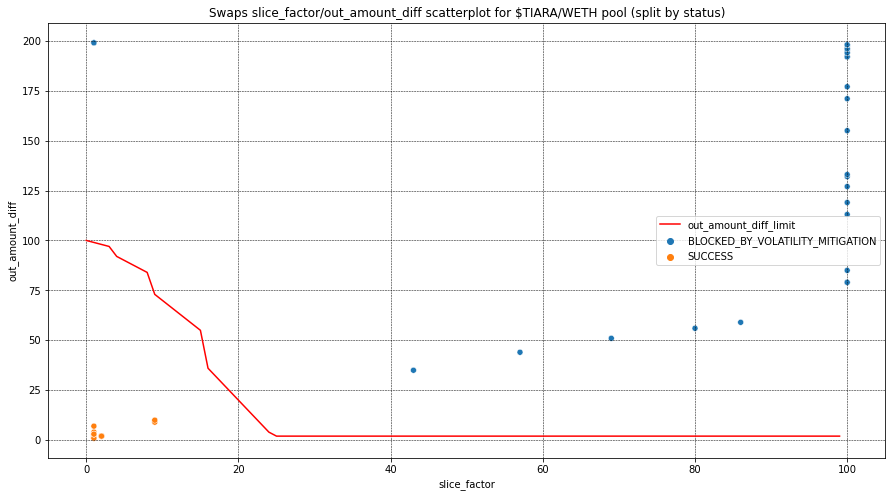

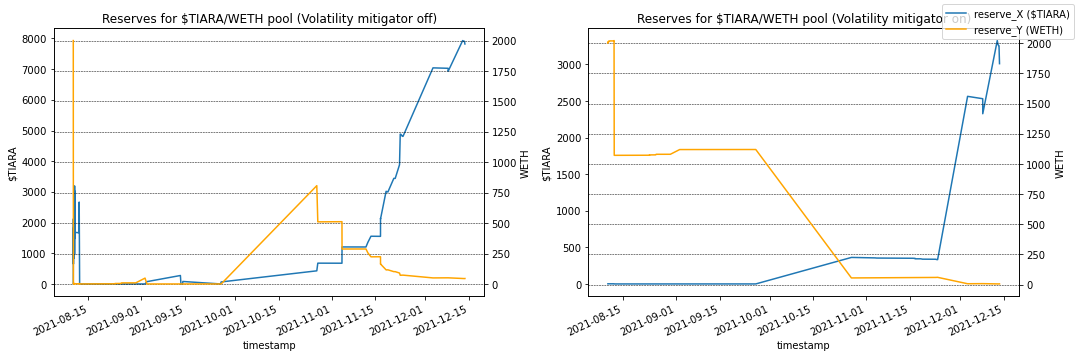

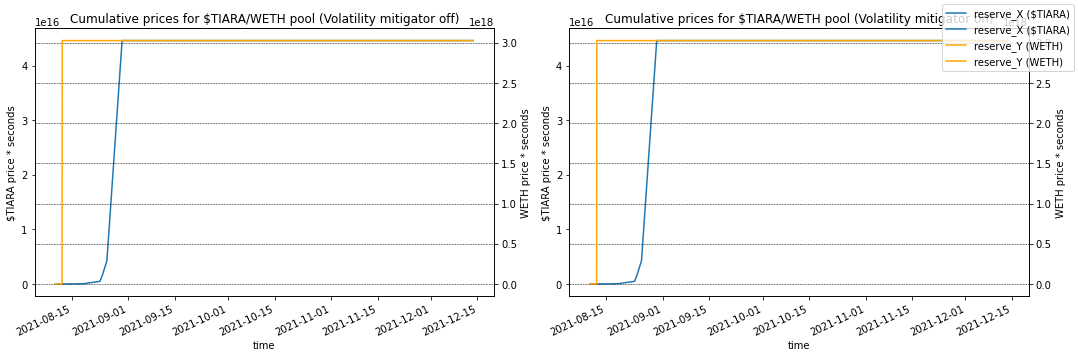

In [34]:
tiara_weth_sim.show_mitigation_comparison(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.px_hist_blocked_transactions_slice(tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.px_hist_blocked_transactions_difference_from_oracle(tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.plot_slice_distribution_and_diff_limit_line(tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.plot_reserves_with_and_without_mitigation(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.plot_cumulative_prices_with_and_without_mitigation(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_off_df, makeBigNumConvert=True)